
# Financial Ratios Analysis Report

This project analyzes and visualizes financial ratios to support informed investment decision-making processes within a hedge fund context. The analysis addresses real-world challenges by assessing profitability and leverage across diverse industries, with particular attention given to real estate companies. The aim is to evaluate whether highly leveraged real estate companies demonstrate greater profitability, thereby guiding strategic investment decisions.

## Project Workflow Steps

The workflow for this project includes:

1. **Data Preparation**: Acquire datasets and identify common columns (`Company`, `comp_type`, `Year`).

2. **Ratio Calculation**:
   - Compute and store leverage ratios (`leverage_ratio`).
   - Compute and store profitability ratios (`profitability_ratio`).

3. **Analytical Insights**:
   - Determine the industry with the lowest profitability (`lowest_profitability`).
   - Determine the industry with the highest leverage (`highest_leverage`).
   - Assess the relationship between leverage and profitability for real estate companies (`relationship`).

4. **Visualization and Reporting**:
   - Visualize financial ratios.
   - Summarize insights for actionable investment strategy.

.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Importing & loading the datasets
b_sheet = pd.read_excel('Balance_Sheet.xlsx')
income_st = pd.read_excel('Income_Statement.xlsx')

#Information of the Balance sheet (b_sheet) data
b_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 60 non-null     int64  
 1   Year                       60 non-null     int64  
 2   comp_type                  60 non-null     object 
 3   company                    60 non-null     object 
 4   Accounts Payable           60 non-null     int64  
 5   Cash                       60 non-null     int64  
 6   Inventory                  44 non-null     float64
 7   Property Plant Equipment   60 non-null     int64  
 8   Short Term Investments     37 non-null     float64
 9   Total Assets               60 non-null     int64  
 10  Total Current Assets       60 non-null     int64  
 11  Total Current Liabilities  60 non-null     int64  
 12  Total Liab                 60 non-null     int64  
 13  Total Stockholder Equity   60 non-null     int64  
d

In [4]:
#Information of the Balance sheet (income_st) data
income_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                60 non-null     int64 
 1   Year                      60 non-null     int64 
 2   comp_type                 60 non-null     object
 3   company                   60 non-null     object
 4   Cost Of Goods Sold        60 non-null     int64 
 5   Gross Profit              60 non-null     int64 
 6   Operating Income          60 non-null     int64 
 7   Total Operating Expenses  60 non-null     int64 
 8   Total Revenue             60 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 4.3+ KB


In [5]:
# Merging both dataframes as a single one called (df_ratios)
df_ratios = pd.merge(b_sheet, income_st, on= ['company', 'Year','comp_type' ])
df_ratios.head()

,Unnamed: 0_x,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Unnamed: 0_y,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,0,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,1,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,2,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,3,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,4,42910000000,82933000000,42959000000,82884000000,125843000000


In [6]:
# Compute debt-to-equity ratio
df_ratios["leverage_ratio"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]
df_ratios.head()

,Unnamed: 0_x,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,...,Total Current Liabilities,Total Liab,Total Stockholder Equity,Unnamed: 0_y,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,leverage_ratio
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,...,105718000000,248028000000,90488000000,0,161782000000,98392000000,63930000000,196244000000,260174000000,2.741004
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,...,105392000000,258549000000,65339000000,1,169559000000,104956000000,66288000000,208227000000,274515000000,3.957039
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,...,125481000000,287912000000,63090000000,2,212981000000,152836000000,108949000000,256868000000,365817000000,4.563512
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,...,153982000000,302083000000,50672000000,3,223546000000,170782000000,119437000000,274891000000,394328000000,5.961537
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,...,69420000000,184226000000,102330000000,4,42910000000,82933000000,42959000000,82884000000,125843000000,1.800313


In [7]:
# Compute gross margin ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])  /  df_ratios["Total Revenue"]


In [8]:
df_ratios.head()

,Unnamed: 0_x,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,...,Total Liab,Total Stockholder Equity,Unnamed: 0_y,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,leverage_ratio,profitability_ratio
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,...,248028000000,90488000000,0,161782000000,98392000000,63930000000,196244000000,260174000000,2.741004,0.378178
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,...,258549000000,65339000000,1,169559000000,104956000000,66288000000,208227000000,274515000000,3.957039,0.382332
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,...,287912000000,63090000000,2,212981000000,152836000000,108949000000,256868000000,365817000000,4.563512,0.417794
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,...,302083000000,50672000000,3,223546000000,170782000000,119437000000,274891000000,394328000000,5.961537,0.433096
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,...,184226000000,102330000000,4,42910000000,82933000000,42959000000,82884000000,125843000000,1.800313,0.659020


In [9]:
# The "comp_type" with the lowest average profitability ratio
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))

lowest_profitability = "fmcg"

           profitability_ratio
comp_type                     
fmcg                  0.514396
real_est              0.534848
tech                  0.572062


In [10]:
# The "comp_type" with the highest leverage ratio
print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio"))

highest_leverage = "real_est"

           leverage_ratio
comp_type                
fmcg             2.997896
real_est         5.692041
tech             1.777448


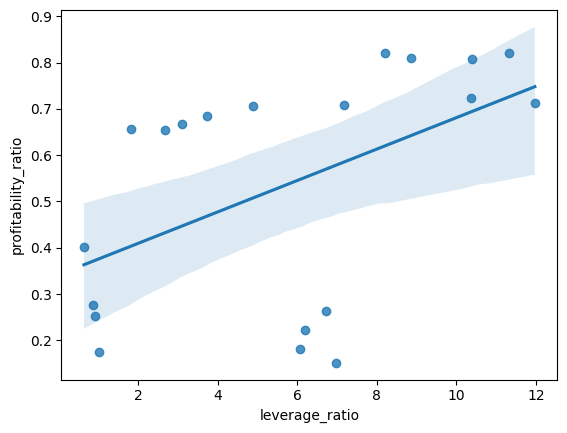

In [11]:
# Visualize the correlation between "leverage" and "profitability"  in the real estate companies.
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")
relationship = "positive"